In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [14]:
# Create a DataFrame with your data
# dependent_varible = no of accidents(y)
# independent_variable(factors that influence accident severity) = "Injuries (X1)," "Deaths (X2)," "2W (X3)," and "Car (X4).
# Load the dataset from the CSV file
file_path = 'data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()



,No of Accidents (Y),Injuries (X1),Deaths (X2),2W (X3),Car (X4),Predicted (Yg)
0,61,15,3,24,17,50.800156
1,24,45,1,17,8,66.701466
2,81,41,9,11,17,61.764668
3,70,18,6,18,8,49.662884
4,30,34,7,13,9,56.822579


In [15]:
# Define the coefficients
a0 = 43.60122582
a1 = 0.010192044
a2 = 7.23865e-13
a3 = 0.008516712
a4 = 3.26086e-07

# Calculate the predicted values Yg
df['Predicted (Yg)'] = (a0 + 
                        a1 * df['Injuries (X1)'] ** 2 + 
                        a2 * df['Deaths (X2)'] ** 2 + 
                        a3 * df['2W (X3)'] ** 2 + 
                        a4 * df['Car (X4)'] ** 2)

# Show the first few rows with the predictions
df[['No of Accidents (Y)', 'Predicted (Yg)']].head()


,No of Accidents (Y),Predicted (Yg)
0,61,50.800156
1,24,66.701466
2,81,61.764668
3,70,49.662884
4,30,56.822579


In [16]:
# Calculate SSR, SSE, and R^2
SST = ((df['No of Accidents (Y)'] - df['No of Accidents (Y)'].mean()) ** 2).sum()
SSR = ((df['Predicted (Yg)'] - df['No of Accidents (Y)'].mean()) ** 2).sum()
SSE = ((df['No of Accidents (Y)'] - df['Predicted (Yg)']) ** 2).sum()

R_squared = SSR / SST

# Mean Squared Error and Root Mean Squared Error
MSE = mean_squared_error(df['No of Accidents (Y)'], df['Predicted (Yg)'])
RMSE = np.sqrt(MSE)

# Print the results
print(f'Sum of Squares of Regression (SSR): {SSR}')
print(f'Sum of Squares of Error (SSE): {SSE}')
print(f'Total Sum of Squares (SST): {SST}')
print(f'Coefficient of Determination (R^2): {R_squared}')
print(f'Mean Squared Error (MSE): {MSE}')
print(f'Root Mean Squared Error (RMSE): {RMSE}')


Sum of Squares of Regression (SSR): 64560.726103660505
Sum of Squares of Error (SSE): 757034.3018138992
Total Sum of Squares (SST): 694413.5589999999
Coefficient of Determination (R^2): 0.09297158050403292
Mean Squared Error (MSE): 757.0343018138992
Root Mean Squared Error (RMSE): 27.514256337649748


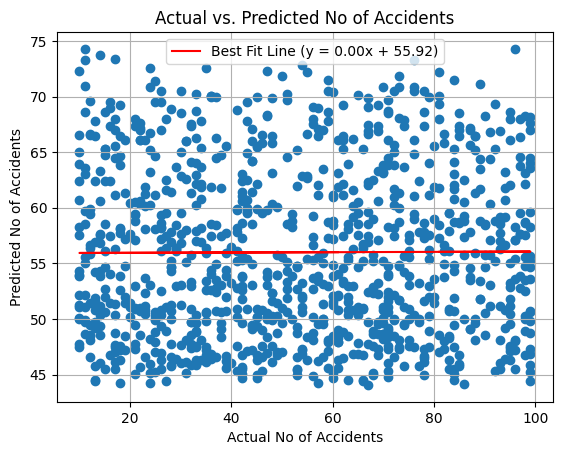

In [17]:
# Visualize the results
plt.scatter(df['No of Accidents (Y)'], df['Predicted (Yg)'])
plt.xlabel('Actual No of Accidents')
plt.ylabel('Predicted No of Accidents')
plt.title('Actual vs. Predicted No of Accidents')

# Calculate and plot the best-fit line
m, b = np.polyfit(df['No of Accidents (Y)'], df['Predicted (Yg)'], 1)
plt.plot(df['No of Accidents (Y)'], m * df['No of Accidents (Y)'] + b, color='red', label=f'Best Fit Line (y = {m:.2f}x + {b:.2f})')


plt.legend()
plt.grid()
plt.show()

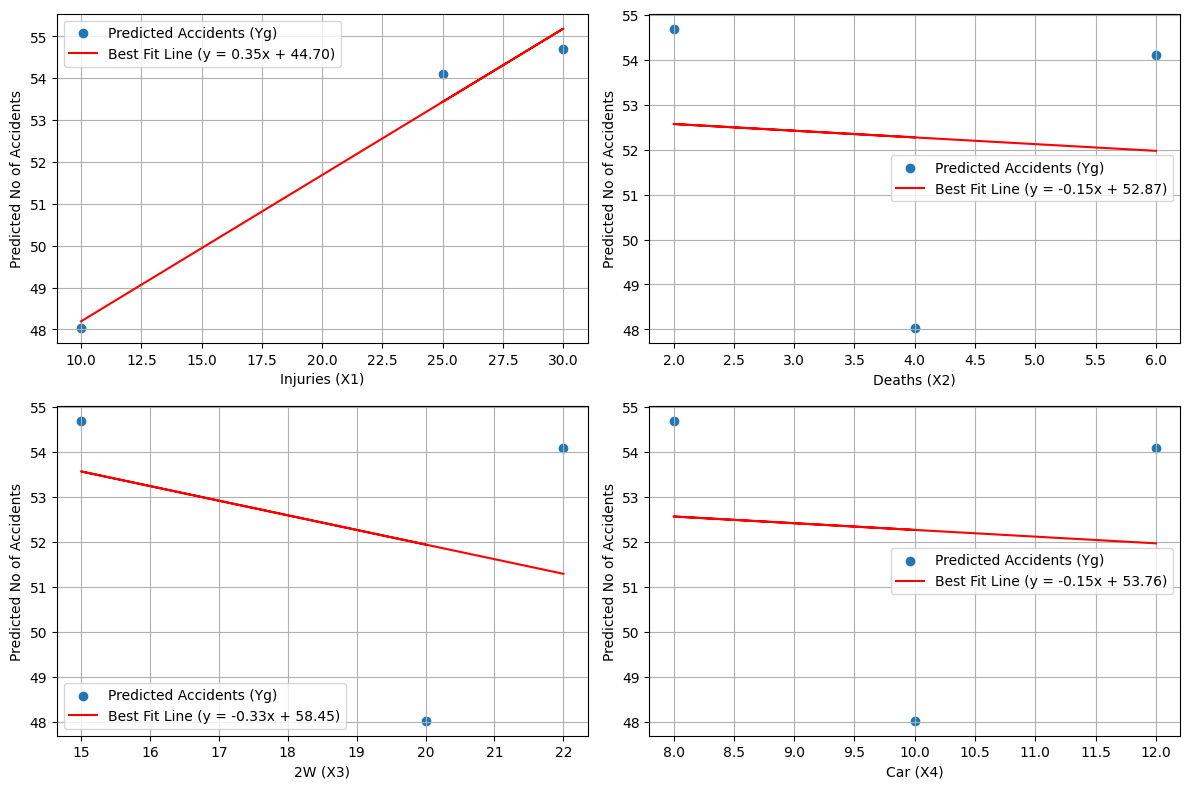

In [18]:
# MAKE PREDICTIONS AND VISUALIZE
# Hypothetical data
hypothetical_data = {
    'Injuries (X1)': [25, 30, 10],  # Modify these values as needed
    'Deaths (X2)': [6, 2, 4],      # Modify these values as needed
    '2W (X3)': [22, 15, 20],      # Modify these values as needed
    'Car (X4)': [12, 8, 10]       # Modify these values as needed
}

hypothetical_df = pd.DataFrame(hypothetical_data)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Calculate and plot best-fit lines for each variable
for i, var in enumerate(hypothetical_df.columns):
    m, b = np.polyfit(hypothetical_df[var], a0 + a1 * hypothetical_df['Injuries (X1)'] ** 2 + a2 * hypothetical_df['Deaths (X2)'] ** 2 + a3 * hypothetical_df['2W (X3)'] ** 2 + a4 * hypothetical_df['Car (X4)'] ** 2, 1)
    axs[i // 2, i % 2].scatter(hypothetical_df[var], a0 + a1 * hypothetical_df['Injuries (X1)'] ** 2 + a2 * hypothetical_df['Deaths (X2)'] ** 2 + a3 * hypothetical_df['2W (X3)'] ** 2 + a4 * hypothetical_df['Car (X4)'] ** 2, label=f'Predicted Accidents (Yg)')
    axs[i // 2, i % 2].set_xlabel(var)
    axs[i // 2, i % 2].set_ylabel('Predicted No of Accidents')
    axs[i // 2, i % 2].plot(hypothetical_df[var], m * hypothetical_df[var] + b, color='red', label=f'Best Fit Line (y = {m:.2f}x + {b:.2f})')
    axs[i // 2, i % 2].legend()
    axs[i // 2, i % 2].grid()

plt.tight_layout()
plt.show()




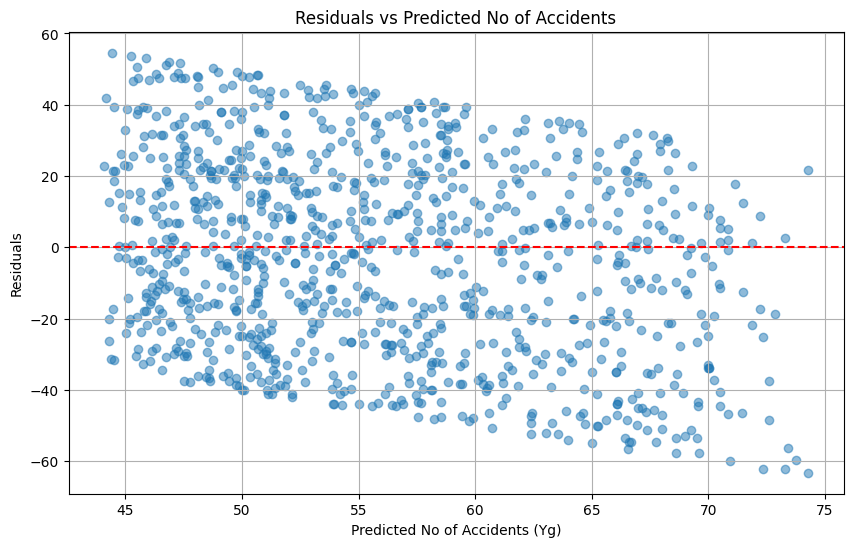

In [19]:
# Calculate residuals
df['Residuals'] = df['No of Accidents (Y)'] - df['Predicted (Yg)']

# Plot Residuals
plt.figure(figsize=(10, 6))
plt.scatter(df['Predicted (Yg)'], df['Residuals'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted No of Accidents (Yg)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted No of Accidents')
plt.grid(True)
plt.show()


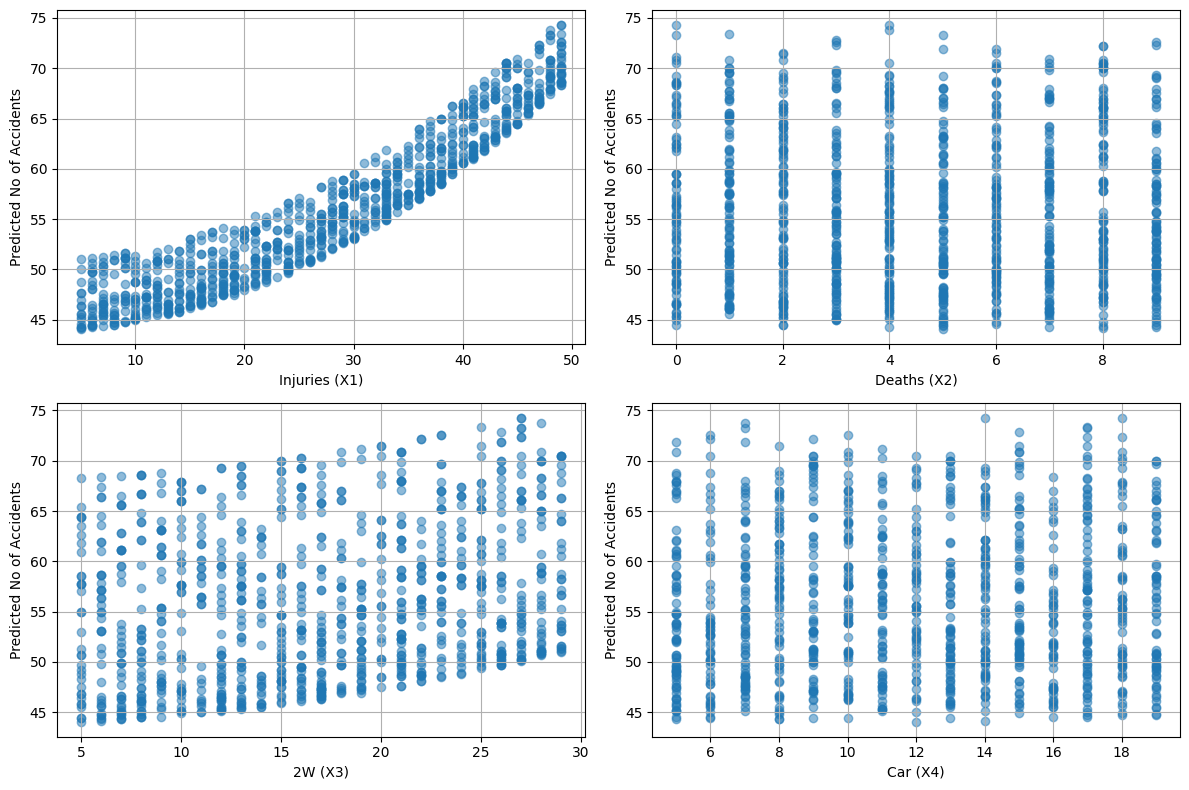

In [20]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

variables = ['Injuries (X1)', 'Deaths (X2)', '2W (X3)', 'Car (X4)']
for i, var in enumerate(variables):
    axs[i // 2, i % 2].scatter(df[var], df['Predicted (Yg)'], alpha=0.5)
    axs[i // 2, i % 2].set_xlabel(var)
    axs[i // 2, i % 2].set_ylabel('Predicted No of Accidents')
    axs[i // 2, i % 2].grid(True)

plt.tight_layout()
plt.show()
